In [1]:
#Import packages

#Scipy
from scipy import stats 
from scipy.stats import uniform,ranksums 

#Pandas
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

#Others
from sklearn import preprocessing
import joblib 
import random
import numpy as np
import os
import math
import warnings

In [2]:
def print_RxC(dataframe):
    rows= dataframe.shape[0]
    columns= dataframe.shape[1]
    rows_columns=print(dataframe.shape[0],"Moleculars ×",dataframe.shape[1],"Descriptors")
    return rows_columns
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='spearman')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [3]:
#Set the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:\\Users\\A\\Desktop\\Paper_0_Hydrogel")

In [4]:
X_NAomit_data= pd.read_csv('./Original data/X_NAomit_data.csv',index_col=0)
Raw_data= pd.read_csv('./Original data/Raw_data.csv',index_col=0)
X_scaled_data=pd.read_csv("./Original data/X_scaled_data.csv",index_col=0)
ML_data=pd.read_csv("./Original data/ML_data.csv",index_col=0)
X_scaled_data=pd.read_csv("./Original data/X_scaled_data.csv",index_col=0)
print_RxC(X_NAomit_data)
X_NAomit_data.head()

71 Moleculars × 4175 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [5]:
#Scale data
Scaler = preprocessing.MinMaxScaler()
Transformer =Scaler.fit(X_NAomit_data)
X_scale_data=Transformer.transform(X_NAomit_data)
X_scale_data =pd.DataFrame(X_scale_data)
X_scale_data.columns=X_NAomit_data.columns
X_scale_data.index=Raw_data.index
print_RxC(X_scale_data)
X_scale_data.head()

71 Moleculars × 4175 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.344210,0.080461,0.068574,0.061704,0.061803,0.626247,0.664286,0.241584,0.655409,...,0.0,0.0,0.0,0.31250,0.121212,0.339356,0.21875,0.775326,0.079529,0.156831
Ma_2019_U,0.075722,0.355749,0.027968,0.027742,0.008163,0.014576,0.555490,0.837066,0.089947,0.495217,...,0.0,0.0,0.0,0.00000,0.060606,0.210711,0.09375,0.740235,0.022043,0.038750
Ma_2019_C,0.073472,0.303509,0.035603,0.039171,0.020739,0.031203,0.460756,0.706940,0.073575,0.607187,...,0.0,0.0,0.0,0.00000,0.060606,0.210711,0.09375,0.740235,0.022043,0.038750
Ma_2019_G,0.165381,0.382840,0.098263,0.088160,0.072074,0.077405,0.650332,0.784635,0.195361,0.694387,...,0.0,0.0,0.0,0.15625,0.151515,0.394030,0.34375,0.871200,0.109017,0.278438
Ma_2019_dA,0.091909,0.303087,0.062659,0.048989,0.051335,0.046201,0.600609,0.536172,0.290789,0.613916,...,0.0,0.0,0.0,0.31250,0.090909,0.278607,0.12500,0.713778,0.066666,0.119558


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,random_state=0)
pca.fit(X_scale_data)
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.48883718 0.15907151 0.075489  ]
[66.24387154 21.55628264 10.2297528 ]
4175
4175


In [7]:
newdf = pca.fit_transform(X_scale_data)
PCA_4175=pd.DataFrame(newdf)
PCA_4175.columns=["PCA1","PCA2","PCA3"]
PCA_4175.index=Raw_data.index
PCA_4175['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
PCA_4175.head()

,PCA1,PCA2,PCA3,Hydrogel-forming ability
ID,,,,
Ma_2019_A,-8.110369,3.023317,0.228622,Gelator
Ma_2019_U,-9.203058,-5.161289,4.303567,Gelator
Ma_2019_C,-9.905787,-4.162274,3.496028,Gelator
Ma_2019_G,-7.421788,1.593281,-1.369542,Gelator
Ma_2019_dA,-8.889000,3.040215,2.050822,Gelator


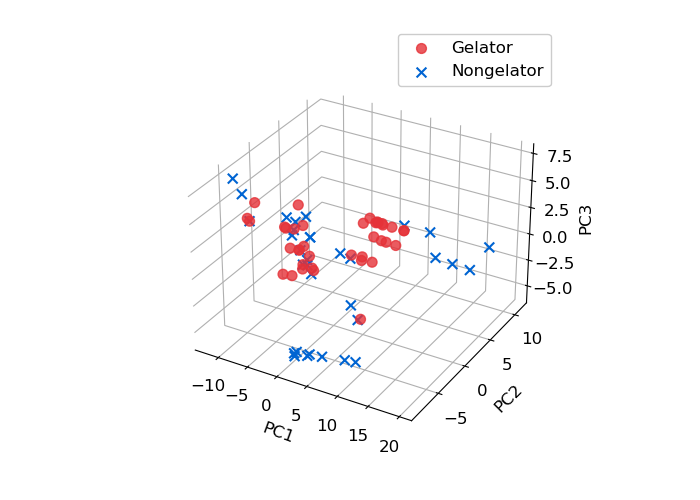

In [8]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_4175.loc[PCA_4175["Hydrogel-forming ability"] == "Gelator"]
nogel_pca=PCA_4175.loc[PCA_4175["Hydrogel-forming ability"] == "Nongelator"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelator',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Nongelator',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.8,1),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 

plt.savefig("./original figure/Figure1 b.png", dpi=300,format="png")
plt.show()

In [10]:
PCA_4175.to_csv("./Results/Fig2d.csv",sep=',')

In [11]:
pca = PCA(n_components=3,random_state=0)
pca.fit(X_scaled_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_) 
print(pca.n_features_)
print(pca.n_features_in_)

[0.39362708 0.19720954 0.10563493]
[3.41747369 1.71217497 0.91712335]
144
144


In [12]:
newdf = pca.fit_transform(X_scaled_data)
PCA_144=pd.DataFrame(newdf)
PCA_144.columns=["PCA1","PCA2","PCA3"]
PCA_144.index=Raw_data.index
PCA_144['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
PCA_144.head()

,PCA1,PCA2,PCA3,Hydrogel-forming ability
ID,,,,
Ma_2019_A,-0.147911,0.037672,-1.055510,Gelator
Ma_2019_U,-1.158987,1.798780,0.163468,Gelator
Ma_2019_C,-0.748797,1.755291,-1.176458,Gelator
Ma_2019_G,-0.301994,-0.187490,-0.528063,Gelator
Ma_2019_dA,-0.662048,0.753784,-1.173629,Gelator


In [13]:
PCA_144.to_csv("./Results/Supplementary Fig. 4.csv",sep=',')

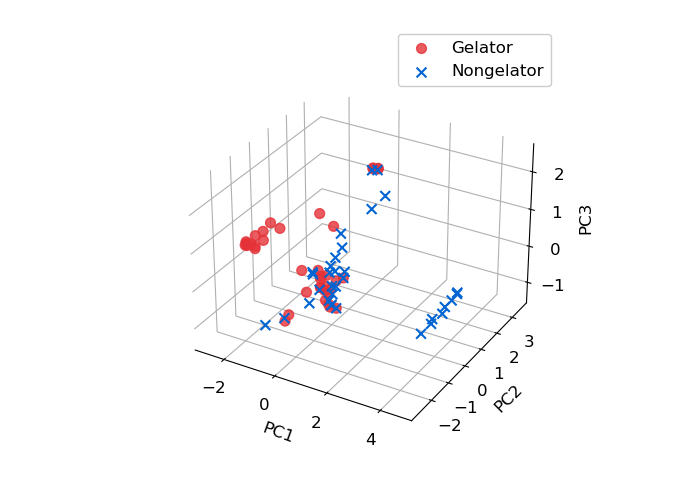

In [14]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_144.loc[PCA_144["Hydrogel-forming ability"] == "Gelator"]
nogel_pca=PCA_144.loc[PCA_144["Hydrogel-forming ability"] == "Nongelator"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelator',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Nongelator',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.8,1),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 

plt.savefig("./original figure/Figure S3.png", dpi=300,format="png")
plt.show()

In [15]:
pca = PCA(n_components=3,random_state=0)
pca.fit(ML_data)
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.35123177 0.16126742 0.10588779]
[1.00705411 0.46238706 0.30360218]
40
40


In [16]:
newdf = pca.fit_transform(ML_data)
PCA_40=pd.DataFrame(newdf)
PCA_40.columns=["PCA1","PCA2","PCA3"]
PCA_40.index=Raw_data.index
PCA_40['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
PCA_40.head()

,PCA1,PCA2,PCA3,Hydrogel-forming ability
ID,,,,
Ma_2019_A,0.060760,-0.787136,-0.443432,Gelator
Ma_2019_U,0.251264,0.889912,-0.977342,Gelator
Ma_2019_C,0.877747,-0.234788,-0.955000,Gelator
Ma_2019_G,-0.413796,-0.353141,-0.096510,Gelator
Ma_2019_dA,0.128364,-0.699121,-0.541369,Gelator


In [17]:
PCA_40.to_csv("./Results/Fig 1e.csv",sep=',')

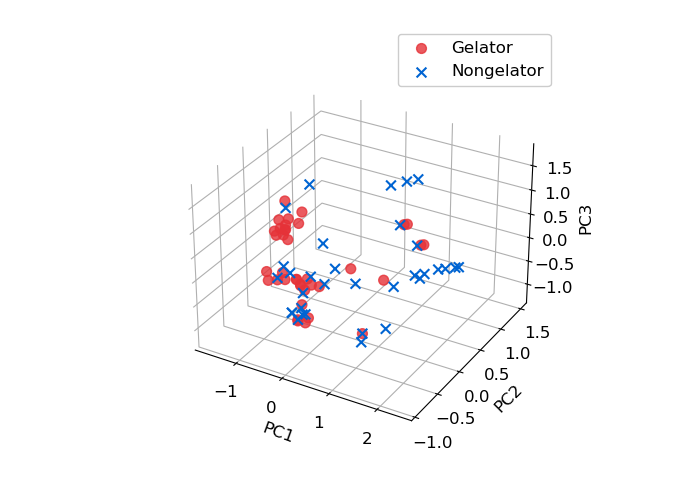

In [18]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_40.loc[PCA_40["Hydrogel-forming ability"] == "Gelator"]
nogel_pca=PCA_40.loc[PCA_40["Hydrogel-forming ability"] == "Nongelator"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelator',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Nongelator',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.8,1),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 

plt.savefig("./original figure/Figure1 e.png", dpi=300,format="png")
plt.show()

In [19]:
import seaborn as sns
df_corr=X_scale_data.corr(method='spearman')
df_corr
df_corr.to_csv("./Results/Fig S1.csv",sep=',')

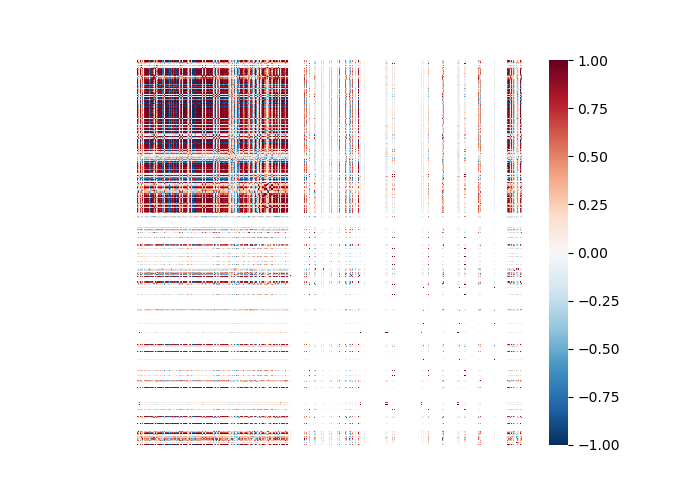

In [18]:
%matplotlib ipympl
sns.heatmap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False, xticklabels=False, yticklabels=False)
plt.savefig('./original figure/Figure S1.png', dpi=300,format="png")

In [27]:
df_corr=X_scaled_data.corr(method='spearman')
df_corr
df_corr.to_csv("./Results/Fig S2.csv",sep=',')

,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
MATS3p,1.000000,0.886778,0.567571,0.567571,0.567571,-0.957475,-0.585931,-0.259889,0.539758,0.538657,...,-0.214633,-0.050042,0.142987,-0.365789,-0.300324,0.233549,-0.254347,0.252478,0.251925,-0.156104
MATS3v,0.886778,1.000000,0.442856,0.442856,0.442856,-0.887080,-0.456225,-0.363142,0.422792,0.422228,...,-0.360470,-0.031405,0.162354,-0.541087,-0.360769,0.170839,-0.369502,0.189480,0.337005,-0.253331
SM10_AEA(dm),0.567571,0.442856,1.000000,1.000000,1.000000,-0.579255,-0.784048,-0.191216,0.992800,0.991876,...,-0.001670,-0.013380,0.167699,-0.154051,-0.228355,0.749525,-0.243138,0.743185,0.221956,-0.182033
Eig01_EA(ed),0.567571,0.442856,1.000000,1.000000,1.000000,-0.579255,-0.784048,-0.191216,0.992800,0.991876,...,-0.001670,-0.013380,0.167699,-0.154051,-0.228355,0.749525,-0.243138,0.743185,0.221956,-0.182033
SpMax_EA(ed),0.567571,0.442856,1.000000,1.000000,1.000000,-0.579255,-0.784048,-0.191216,0.992800,0.991876,...,-0.001670,-0.013380,0.167699,-0.154051,-0.228355,0.749525,-0.243138,0.743185,0.221956,-0.182033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM15_EA(ri),0.233549,0.170839,0.749525,0.749525,0.749525,-0.199317,-0.453261,0.107926,0.787758,0.793993,...,0.323258,0.256210,0.257418,0.244096,0.132959,1.000000,0.104553,0.966304,-0.166280,0.237329
GNar,-0.254347,-0.369502,-0.243138,-0.243138,-0.243138,0.340638,0.437156,0.356118,-0.236495,-0.233886,...,0.534182,0.389076,-0.063329,0.889258,0.956920,0.104553,1.000000,0.049239,-0.981203,0.739024
SM03_EA(ed),0.252478,0.189480,0.743185,0.743185,0.743185,-0.213178,-0.492265,0.137411,0.781728,0.789691,...,0.314328,0.290707,0.268512,0.190994,0.057530,0.966304,0.049239,1.000000,-0.101830,0.237252
X0A,0.251925,0.337005,0.221956,0.221956,0.221956,-0.353388,-0.404221,-0.345415,0.204648,0.202588,...,-0.535337,-0.421548,0.082934,-0.868265,-0.971690,-0.166280,-0.981203,-0.101830,1.000000,-0.765601


In [28]:
df_corr.to_csv("./Results/Figure S2.csv",sep=',')

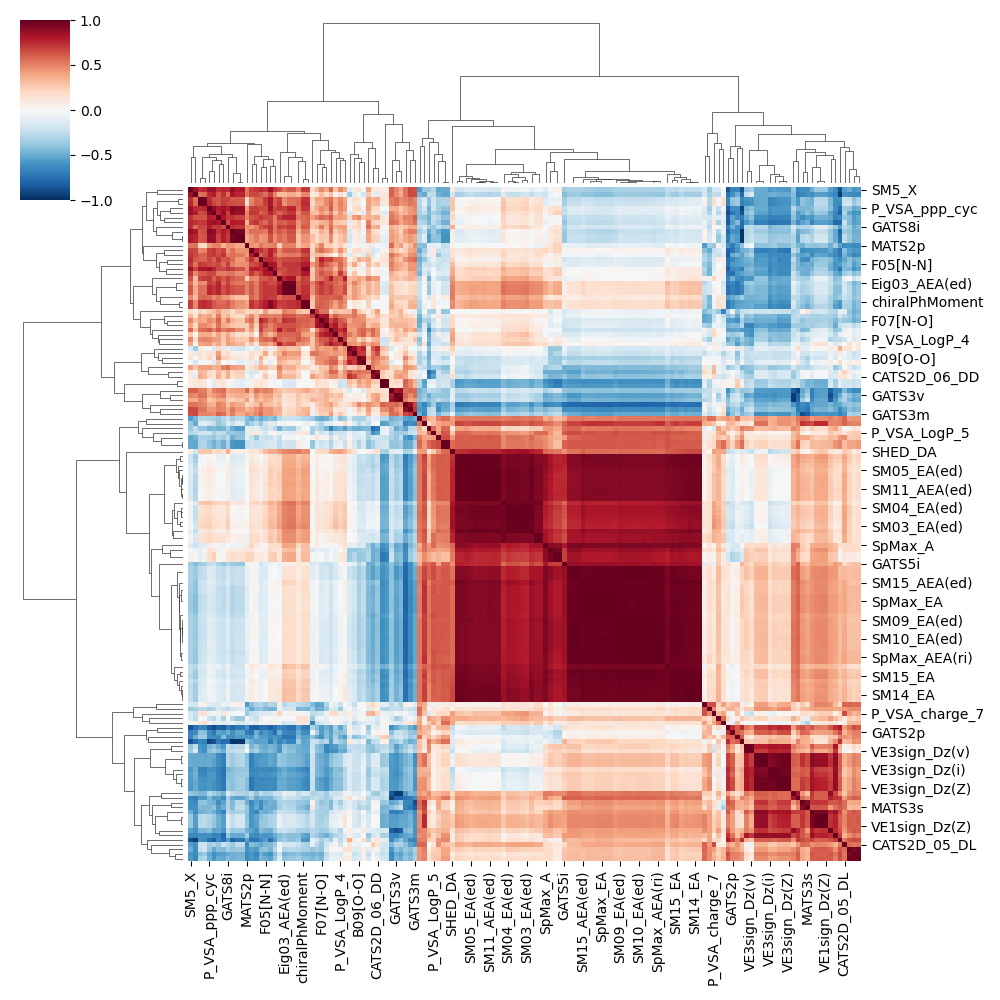

In [19]:
import seaborn as sns
df_corr=X_scaled_data.corr(method='spearman')
df_corr
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./original figure/Figure S2.png', dpi=300,format="png")

In [30]:
df_corr=ML_data.corr(method='spearman')

df_corr.to_csv("./Results/Fig S3.csv",sep=',')
df_corr

,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,P_VSA_charge_4,CATS2D_09_DA,B09[O-O],CATS2D_06_DL,...,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,Eig03_AEA(ed),CATS2D_05_DA,GATS2p,C-016,s2_pathLength,GATS8i
MATS3p,1.000000,0.567571,-0.585931,-0.259889,0.667757,0.511688,0.477283,-0.265164,-0.127974,0.249119,...,0.355692,-0.330430,-0.178954,-0.040399,-0.093586,-0.305030,0.248923,0.154612,0.142987,-0.156104
SM10_AEA(dm),0.567571,1.000000,-0.784048,-0.191216,0.434900,0.314948,0.584202,-0.142198,-0.350379,0.083911,...,0.317051,-0.083525,-0.469281,-0.214243,0.144421,-0.116841,0.039695,0.075893,0.167699,-0.182033
GATS7s,-0.585931,-0.784048,1.000000,0.302238,-0.532971,-0.428190,-0.515701,0.451227,0.499239,0.058263,...,-0.088020,0.224518,0.463885,0.205592,0.106859,0.100321,-0.285916,-0.243192,0.101999,0.293040
F07[N-O],-0.259889,-0.191216,0.302238,1.000000,-0.440695,-0.488117,-0.342527,0.772755,0.462625,-0.518182,...,-0.038926,0.496972,0.293191,0.392686,0.735835,0.551468,-0.561609,-0.606210,-0.195507,0.526102
VE1sign_Dz(v),0.667757,0.434900,-0.532971,-0.440695,1.000000,0.541023,0.395395,-0.563455,-0.167349,0.307639,...,0.306666,-0.351706,-0.382018,0.051116,-0.377679,-0.299115,0.543050,0.293116,0.097543,-0.380672
VE3sign_D/Dt,0.511688,0.314948,-0.428190,-0.488117,0.541023,1.000000,0.146712,-0.495850,-0.177965,0.557839,...,0.226280,-0.639217,-0.244427,0.029311,-0.461927,-0.490196,0.514456,0.496234,0.332618,-0.507960
P_VSA_charge_4,0.477283,0.584202,-0.515701,-0.342527,0.395395,0.146712,1.000000,-0.199127,-0.488211,-0.102849,...,0.417302,-0.086269,-0.450276,-0.418457,-0.325651,-0.315714,0.258674,0.331763,0.267133,-0.343470
CATS2D_09_DA,-0.265164,-0.142198,0.451227,0.772755,-0.563455,-0.495850,-0.199127,1.000000,0.376704,-0.273493,...,0.080590,0.545550,0.365013,0.063876,0.660763,0.181874,-0.655244,-0.567647,0.075181,0.633996
B09[O-O],-0.127974,-0.350379,0.499239,0.462625,-0.167349,-0.177965,-0.488211,0.376704,1.000000,-0.037072,...,-0.035158,0.056253,0.381106,0.708565,0.402491,0.278728,-0.123759,-0.357646,-0.194278,0.220796
CATS2D_06_DL,0.249119,0.083911,0.058263,-0.518182,0.307639,0.557839,-0.102849,-0.273493,-0.037072,1.000000,...,0.233659,-0.565000,0.117928,-0.101510,-0.294053,-0.433894,0.318158,0.360456,0.412222,-0.088029


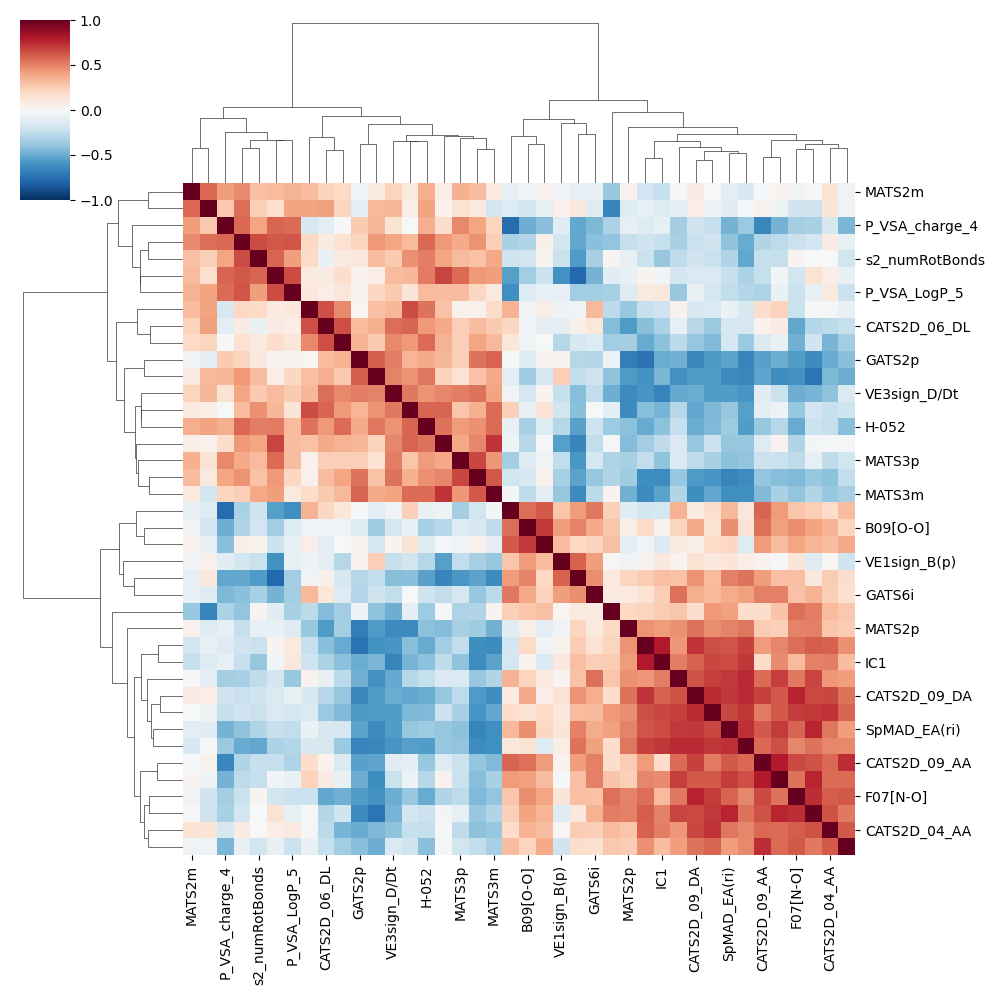

In [20]:
import seaborn as sns
df_corr=ML_data.corr(method='spearman')
df_corr
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./original figure/Figure1_d.png', dpi=600,format="svg")

In [20]:
X_NAomit_data

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Tang_2019_DideoxyC,211.25,7.544643,16.8426,28.7053,17.1876,32.1991,0.601521,1.025189,0.613843,1.149968,...,0.0,0.0,0.0,0.0,12.0,0.800000,6.00,0.400000,13.597226,7.439730
Peters_2014_3,268.26,8.653548,19.7668,32.5781,19.3409,35.7010,0.637639,1.050906,0.623900,1.151645,...,0.0,0.0,0.0,5.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182


In [21]:
#Ranksum test
Ranksums_data=X_NAomit_data
Ranksums_data["Hydrogel-forming ability"]=Raw_data['Hydrogel-forming ability']
Notgelable=Ranksums_data.loc[Ranksums_data["Hydrogel-forming ability"] == 'Nongelator']
Gelable=Ranksums_data.loc[Ranksums_data["Hydrogel-forming ability"] == 'Gelator']
Ranksums_result=[]
for i in list(Ranksums_data.columns):
 NG = Notgelable[i]
 G = Gelable[i]
 Ranksums_caculate=ranksums(NG, G, alternative='two-sided')
 Ranksums_result.append(Ranksums_caculate)
Ranksums_results = pd.DataFrame(Ranksums_result, columns=['Statistics','Pvalues'])
Ranksums_results.index=Ranksums_data.columns#
Ranksums_results = Ranksums_results.drop('Hydrogel-forming ability',axis = 0)
Ranksums_results.head()

,Statistics,Pvalues
MW,0.293979,0.768774
AMW,-1.158622,0.246610
Sv,0.386207,0.699343
Se,0.755122,0.450176
Sp,0.582193,0.560437


In [22]:
NG_mean=Notgelable.median(axis=0) 
G_mean=Gelable.median(axis=0) 
Difference_mean=(G_mean/NG_mean)
Difference_mean

MW                1.063491
AMW               1.014316
Sv                0.993984
Se                0.942996
Sp                1.004720
                    ...   
s34_relSize       0.999621
s34_phSize        1.145161
s34_phRelSize     1.021358
chiralMoment      1.049045
chiralPhMoment    1.050103
Length: 4175, dtype: float64

In [23]:
Ranksums_results['Difference_mean']=Difference_mean
Ranksums_results['Log_P']=-np.log(Ranksums_results['Pvalues'])
Ranksums_results.head()

,Statistics,Pvalues,Difference_mean,Log_P
MW,0.293979,0.768774,1.063491,0.262958
AMW,-1.158622,0.246610,1.014316,1.399945
Sv,0.386207,0.699343,0.993984,0.357614
Se,0.755122,0.450176,0.942996,0.798117
Sp,0.582193,0.560437,1.004720,0.579039


In [24]:
Ranksums_results.to_csv("./Results/Fig.1b.csv",sep=',')

In [25]:
Ranksums_results_a=Ranksums_results.loc[Ranksums_results["Pvalues"] <0.05]
Ranksums_results_b=Ranksums_results.loc[Ranksums_results["Pvalues"] >=0.05]

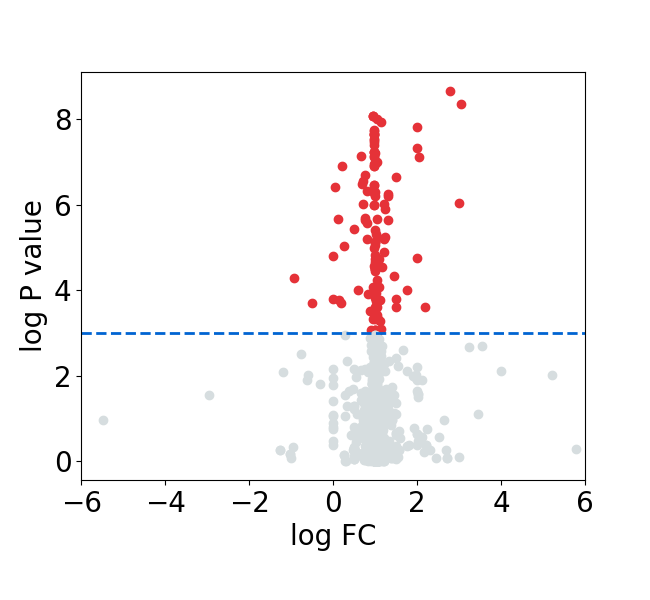

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6.5, 6))
ax=plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.20) 
cm1 = plt.cm.get_cmap('Reds')
cm2 = plt.cm.get_cmap('BuPu_r')
sc1=plt.scatter( Ranksums_results_a['Difference_mean'],Ranksums_results_a['Log_P'],c="#e53238", cmap=cm2)
sc3=plt.scatter( Ranksums_results_b['Difference_mean'],Ranksums_results_b['Log_P'],c="#d6dddf", cmap=cm2)
plt.axhline(y=-np.log(0.05), 
            c="#0064d2",
            linestyle='--',
            linewidth=2,
            markerfacecolor='w',
            markersize=10,
         )
plt.tick_params(labelsize=20) 
ax.set_xlabel('log FC',fontsize = 20)
ax.set_ylabel('log P value',fontsize = 20)
plt.xlim(-6,6)
plt.savefig("./original figure/Figure_1c.png", dpi=300,format="png")


plt.show()